## 방이동이만

In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
f5=pd.read_csv("/content/drive/MyDrive/딥인치즈/Data/f5.csv")
f5.head()

,month,day,season,time,rainfall,dust,dong,wind,humidity,snow,...,weekday,heat,station_num,station_name,station_place,place,latitude,longitude,installation_date,target
0,1,1,winter,0,0.0,23.0,가락동,1.9,41.0,0.0,...,5.0,-4.76,4453,위례중앙푸르지오 201동 앞,위례중앙푸르지오 201동 앞,위례광장로 290,37.474346,127.143265,2020-12-30,1
1,1,1,winter,0,0.0,23.0,거여동,1.9,41.0,0.0,...,5.0,-4.76,1227,거여역 8번출구 뒤,거여역 8번출구 뒤,서울특별시 송파구 오금로 지하 499,37.493126,127.143822,2017-06-27,1
2,1,1,winter,0,0.0,23.0,거여동,1.9,41.0,0.0,...,5.0,-4.76,4895,위례포레샤인15단지 상가,위례포레샤인15단지 상가,송파구 거여동 604,37.486416,127.142059,2021-11-10,1
3,1,1,winter,0,0.0,23.0,마천동,1.9,41.0,0.0,...,5.0,-4.76,2642,마천동 성내천 쉼터,마천동 성내천 쉼터,성내천로 179,37.501495,127.147781,2020-01-15,1
4,1,1,winter,0,0.0,23.0,문정동,1.9,41.0,0.0,...,5.0,-4.76,1244,문정 법조단지8,문정 법조단지8,서울특별시 송파구 법원로 101,37.481537,127.122124,2017-06-27,1


In [5]:
bangyi=f5[f5['dong']=='방이동']
bangyi.shape

(109580, 22)

### 버릴거 버리기

In [6]:
bangyi.columns

Index(['month', 'day', 'season', 'time', 'rainfall', 'dust', 'dong', 'wind',
       'humidity', 'snow', 'temp', 'holiday', 'weekday', 'heat', 'station_num',
       'station_name', 'station_place', 'place', 'latitude', 'longitude',
       'installation_date', 'target'],
      dtype='object')

In [7]:
## 대여소

bangyi.drop(['station_num','station_name','place'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
bangyi.columns

Index(['month', 'day', 'season', 'time', 'rainfall', 'dust', 'dong', 'wind',
       'humidity', 'snow', 'temp', 'holiday', 'weekday', 'heat',
       'station_place', 'latitude', 'longitude', 'installation_date',
       'target'],
      dtype='object')

### 정류소 위치로 클러스터링

In [9]:
station_which=bangyi[['station_place','latitude','longitude']]

In [10]:
station_which.shape

(109580, 3)

In [11]:
sum(station_which.duplicated(['station_place','latitude','longitude']))

109554

In [12]:
station_which=station_which.drop_duplicates(['station_place'],keep='first').reset_index(drop=True)

In [13]:
station_which

,station_place,latitude,longitude
0,송파나루역 4번 출구옆,37.509979,127.112312
1,서울방이동 고분군,37.507866,127.116989
2,몽촌토성역 3번 출구,37.517078,127.112328
3,올림픽공원 북2문,37.523575,127.128044
4,올림픽공원역 1번출구 앞,37.516571,127.131538
5,방이초등학교,37.513962,127.121674
6,올림픽공원사거리(선수촌아파트),37.512020,127.128647
7,방이동 한양3차아파트 옆,37.506302,127.121399
8,올림픽공원 북2문 2,37.523975,127.127510
9,올림픽공원역 3번출구,37.516258,127.130592


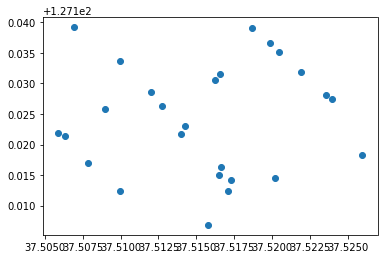

In [14]:
import matplotlib.pyplot as plt

plt.scatter(station_which['latitude'],station_which['longitude'])

### 전처리 + 모델 돌리기

In [15]:
bangyi.head()

,month,day,season,time,rainfall,dust,dong,wind,humidity,snow,temp,holiday,weekday,heat,station_place,latitude,longitude,installation_date,target
7,1,1,winter,0,0.0,23.0,방이동,1.9,41.0,0.0,-8.5,1,5.0,-4.76,송파나루역 4번 출구옆,37.509979,127.112312,2018-11-14,2
8,1,1,winter,0,0.0,23.0,방이동,1.9,41.0,0.0,-8.5,1,5.0,-4.76,서울방이동 고분군,37.507866,127.116989,2020-01-21,1
9,1,1,winter,0,0.0,23.0,방이동,1.9,41.0,0.0,-8.5,1,5.0,-4.76,몽촌토성역 3번 출구,37.517078,127.112328,2021-07-13,2
39,1,1,winter,1,0.0,25.0,방이동,1.8,42.0,0.0,-9.2,1,5.0,-4.76,송파나루역 4번 출구옆,37.509979,127.112312,2018-11-14,1
40,1,1,winter,1,0.0,25.0,방이동,1.8,42.0,0.0,-9.2,1,5.0,-4.76,올림픽공원 북2문,37.523575,127.128044,2020-12-23,2


In [16]:
## 연도 넣기

bangyi['year']=2021
bangyi['year'].loc[bangyi['month']<=4]=2022

<ipython-input-16-685f15cc2bf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangyi['year']=2021
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
bangyi.reset_index(inplace=True)

In [18]:
bangyi.drop(['index','dong'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
bangyi.head()

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,station_place,latitude,longitude,installation_date,target,year
0,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,송파나루역 4번 출구옆,37.509979,127.112312,2018-11-14,2,2022
1,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,서울방이동 고분군,37.507866,127.116989,2020-01-21,1,2022
2,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,몽촌토성역 3번 출구,37.517078,127.112328,2021-07-13,2,2022
3,1,1,winter,1,0.0,25.0,1.8,42.0,0.0,-9.2,1,5.0,-4.76,송파나루역 4번 출구옆,37.509979,127.112312,2018-11-14,1,2022
4,1,1,winter,1,0.0,25.0,1.8,42.0,0.0,-9.2,1,5.0,-4.76,올림픽공원 북2문,37.523575,127.128044,2020-12-23,2,2022


In [20]:
## 설치기간 column 생성

bangyi['installation_year']=bangyi['installation_date'].apply(lambda x:str(x).split('-')[0])
bangyi.drop(['installation_date'],axis=1,inplace=True)
bangyi

<ipython-input-20-e8d8140e2cae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangyi['installation_year']=bangyi['installation_date'].apply(lambda x:str(x).split('-')[0])
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,station_place,latitude,longitude,target,year,installation_year
0,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,송파나루역 4번 출구옆,37.509979,127.112312,2,2022,2018
1,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,서울방이동 고분군,37.507866,127.116989,1,2022,2020
2,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,몽촌토성역 3번 출구,37.517078,127.112328,2,2022,2021
3,1,1,winter,1,0.0,25.0,1.8,42.0,0.0,-9.2,1,5.0,-4.76,송파나루역 4번 출구옆,37.509979,127.112312,1,2022,2018
4,1,1,winter,1,0.0,25.0,1.8,42.0,0.0,-9.2,1,5.0,-4.76,올림픽공원 북2문,37.523575,127.128044,2,2022,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109575,12,31,winter,22,0.0,26.0,3.0,37.0,0.0,-7.5,0,4.0,-6.48,올림픽선수촌아파트 136동 앞,37.509975,127.133697,1,2021,2020
109576,12,31,winter,22,0.0,26.0,3.0,37.0,0.0,-7.5,0,4.0,-6.48,올림픽공원 남2문 앞,37.514240,127.123070,1,2021,2020
109577,12,31,winter,22,0.0,26.0,3.0,37.0,0.0,-7.5,0,4.0,-6.48,한성백제역 1번출구 뒤,37.516479,127.114983,1,2021,2021
109578,12,31,winter,22,0.0,26.0,3.0,37.0,0.0,-7.5,0,4.0,-6.48,몽촌토성역 3번 출구,37.517078,127.112328,2,2021,2021


In [21]:
bangyi['installation_period']=0
for i in range(len(bangyi)):
  bangyi['installation_period'].iloc[i]=int(bangyi['year'].iloc[i])-int(bangyi['installation_year'].iloc[i])

bangyi.head()

<ipython-input-21-f33b55ed561a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangyi['installation_period']=0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,station_place,latitude,longitude,target,year,installation_year,installation_period
0,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,송파나루역 4번 출구옆,37.509979,127.112312,2,2022,2018,4
1,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,서울방이동 고분군,37.507866,127.116989,1,2022,2020,2
2,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,몽촌토성역 3번 출구,37.517078,127.112328,2,2022,2021,1
3,1,1,winter,1,0.0,25.0,1.8,42.0,0.0,-9.2,1,5.0,-4.76,송파나루역 4번 출구옆,37.509979,127.112312,1,2022,2018,4
4,1,1,winter,1,0.0,25.0,1.8,42.0,0.0,-9.2,1,5.0,-4.76,올림픽공원 북2문,37.523575,127.128044,2,2022,2020,2


In [22]:
bangyi.to_csv("/content/drive/MyDrive/딥인치즈/Data/하경_기온 데이터/f5_with설치기간.csv",index=False)

#### 설치기간

In [23]:
bangyi=pd.read_csv("/content/drive/MyDrive/딥인치즈/Data/하경_기온 데이터/f5_with설치기간.csv")
bangyi.head()

,month,day,season,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,station_place,latitude,longitude,target,year,installation_year,installation_period
0,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,송파나루역 4번 출구옆,37.509979,127.112312,2,2022,2018,4
1,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,서울방이동 고분군,37.507866,127.116989,1,2022,2020,2
2,1,1,winter,0,0.0,23.0,1.9,41.0,0.0,-8.5,1,5.0,-4.76,몽촌토성역 3번 출구,37.517078,127.112328,2,2022,2021,1
3,1,1,winter,1,0.0,25.0,1.8,42.0,0.0,-9.2,1,5.0,-4.76,송파나루역 4번 출구옆,37.509979,127.112312,1,2022,2018,4
4,1,1,winter,1,0.0,25.0,1.8,42.0,0.0,-9.2,1,5.0,-4.76,올림픽공원 북2문,37.523575,127.128044,2,2022,2020,2


In [24]:
# bangyi.drop(['installation_year'],axis=1,inplace=True)
bangyi.drop(['year'],axis=1,inplace=True)

In [25]:
bangyi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109580 entries, 0 to 109579
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                109580 non-null  int64  
 1   day                  109580 non-null  int64  
 2   season               109580 non-null  object 
 3   time                 109580 non-null  int64  
 4   rainfall             109580 non-null  float64
 5   dust                 109580 non-null  float64
 6   wind                 109580 non-null  float64
 7   humidity             109580 non-null  float64
 8   snow                 109580 non-null  float64
 9   temp                 109580 non-null  float64
 10  holiday              109580 non-null  int64  
 11  weekday              109580 non-null  float64
 12  heat                 109580 non-null  float64
 13  station_place        109580 non-null  object 
 14  latitude             109580 non-null  float64
 15  longitude        

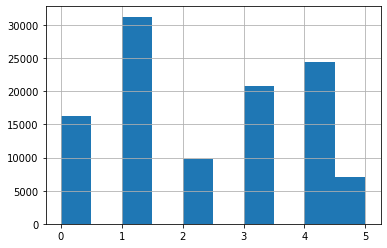

In [26]:
bangyi.installation_period.hist()

In [27]:
bangyi.drop(['latitude','longitude'],axis=1,inplace=True)

In [28]:
numerical=['month','day','time','rainfall','dust','wind','humidity','snow','temp','heat',]
categorical=['season','holiday','station_place','weekday']

In [29]:
## Scaling
from sklearn.preprocessing import StandardScaler

bangyi_normalized=bangyi.copy()
scaler=StandardScaler()
bangyi_normalized[numerical]=scaler.fit_transform(bangyi_normalized[numerical])

In [30]:
bangyi_normalized.corr()

,month,day,time,rainfall,dust,wind,humidity,snow,temp,holiday,weekday,heat,target,installation_year,installation_period
month,1.000000,-0.013982,-0.012521,0.012121,-0.168221,-0.120894,0.269233,-0.031322,0.239432,-0.023177,0.002675,0.252306,0.051422,0.015237,-0.250543
day,-0.013982,1.000000,0.004198,0.009806,-0.032435,-0.046389,0.009223,-0.003160,-0.009223,0.003183,-0.011505,-0.001440,-0.010812,0.001149,-0.000408
time,-0.012521,0.004198,1.000000,-0.013321,0.066488,0.164754,-0.246323,-0.011265,0.099710,0.005539,-0.007247,-0.013604,0.236250,0.023354,-0.018103
rainfall,0.012121,0.009806,-0.013321,1.000000,-0.016636,0.007305,0.103106,-0.001149,0.022273,0.009618,-0.007470,0.032901,-0.037897,-0.006024,-0.003166
dust,-0.168221,-0.032435,0.066488,-0.016636,1.000000,0.028823,-0.025025,0.000311,-0.118196,0.013314,0.049427,-0.140152,0.003033,-0.007447,0.053893
wind,-0.120894,-0.046389,0.164754,0.007305,0.028823,1.000000,-0.332686,0.002143,-0.026805,0.048164,0.029511,-0.112659,0.072619,0.005351,0.033484
humidity,0.269233,0.009223,-0.246323,0.103106,-0.025025,-0.332686,1.000000,0.037634,0.166228,-0.044303,-0.071198,0.322609,-0.115815,-0.011762,-0.096887
snow,-0.031322,-0.003160,-0.011265,-0.001149,0.000311,0.002143,0.037634,1.000000,-0.132661,0.033137,-0.007352,-0.126084,-0.044411,-0.002377,0.018145
temp,0.239432,-0.009223,0.099710,0.022273,-0.118196,-0.026805,0.166228,-0.132661,1.000000,0.026147,0.029730,0.957918,0.212731,-0.007340,-0.150519
holiday,-0.023177,0.003183,0.005539,0.009618,0.013314,0.048164,-0.044303,0.033137,0.026147,1.000000,0.714820,0.009342,0.042591,0.002054,-0.004564


In [31]:
## PCA with heat & temp
from sklearn.decomposition import PCA

pca=PCA(n_components=1)
heat_temp_pca=pca.fit_transform(bangyi_normalized[['heat','temp']])
pca.explained_variance_ratio_

array([0.97895915])

In [32]:
bangyi_pca=bangyi_normalized.copy()
bangyi_pca.drop(['heat','temp'],axis=1,inplace=True)
bangyi_pca['heat_temp_pca']=heat_temp_pca

In [33]:
bangyi_pca.corr()

,month,day,time,rainfall,dust,wind,humidity,snow,holiday,weekday,target,installation_year,installation_period,heat_temp_pca
month,1.000000,-0.013982,-0.012521,0.012121,-0.168221,-0.120894,0.269233,-0.031322,-0.023177,0.002675,0.051422,0.015237,-0.250543,-0.248497
day,-0.013982,1.000000,0.004198,0.009806,-0.032435,-0.046389,0.009223,-0.003160,0.003183,-0.011505,-0.010812,0.001149,-0.000408,0.005389
time,-0.012521,0.004198,1.000000,-0.013321,0.066488,0.164754,-0.246323,-0.011265,0.005539,-0.007247,0.236250,0.023354,-0.018103,-0.043513
rainfall,0.012121,0.009806,-0.013321,1.000000,-0.016636,0.007305,0.103106,-0.001149,0.009618,-0.007470,-0.037897,-0.006024,-0.003166,-0.027882
dust,-0.168221,-0.032435,0.066488,-0.016636,1.000000,0.028823,-0.025025,0.000311,0.013314,0.049427,0.003033,-0.007447,0.053893,0.130555
wind,-0.120894,-0.046389,0.164754,0.007305,0.028823,1.000000,-0.332686,0.002143,0.048164,0.029511,0.072619,0.005351,0.033484,0.070478
humidity,0.269233,0.009223,-0.246323,0.103106,-0.025025,-0.332686,1.000000,0.037634,-0.044303,-0.071198,-0.115815,-0.011762,-0.096887,-0.247031
snow,-0.031322,-0.003160,-0.011265,-0.001149,0.000311,0.002143,0.037634,1.000000,0.033137,-0.007352,-0.044411,-0.002377,0.018145,0.130756
holiday,-0.023177,0.003183,0.005539,0.009618,0.013314,0.048164,-0.044303,0.033137,1.000000,0.714820,0.042591,0.002054,-0.004564,-0.017934
weekday,0.002675,-0.011505,-0.007247,-0.007470,0.049427,0.029511,-0.071198,-0.007352,0.714820,1.000000,0.032481,0.001527,-0.002545,-0.025140


In [34]:
## dummies

bangyi_dummies=bangyi_pca.copy()
bangyi_dummies.drop(categorical,axis=1,inplace=True)
dummies=pd.get_dummies(bangyi_pca[categorical])
bangyi_dummies[dummies.columns]=dummies

In [35]:
bangyi_dummies

,month,day,time,rainfall,dust,wind,humidity,snow,target,installation_year,...,station_place_올림픽공원 북2문 2,station_place_올림픽공원 서1문 앞,station_place_올림픽공원 장미광장,station_place_올림픽공원사거리(선수촌아파트),station_place_올림픽공원역 1번출구 앞,station_place_올림픽공원역 3번출구,station_place_올림픽선수촌아파트 136동 앞,station_place_한성백제역 1번출구 뒤,station_place_한성백제역 2번 출구,station_place_한양3차아파트 3동 앞
0,-1.700795,-1.673666,-2.247719,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,2,2018,...,0,0,0,0,0,0,0,0,0,0
1,-1.700795,-1.673666,-2.247719,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,1,2020,...,0,0,0,0,0,0,0,0,0,0
2,-1.700795,-1.673666,-2.247719,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,2,2021,...,0,0,0,0,0,0,0,0,0,0
3,-1.700795,-1.673666,-2.082408,-0.064305,-0.450350,-0.531777,-1.132034,-0.078714,1,2018,...,0,0,0,0,0,0,0,0,0,0
4,-1.700795,-1.673666,-2.082408,-0.064305,-0.450350,-0.531777,-1.132034,-0.078714,2,2020,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109575,1.578055,1.751403,1.389110,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,1,2020,...,0,0,0,0,0,0,1,0,0,0
109576,1.578055,1.751403,1.389110,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,1,2020,...,0,0,0,0,0,0,0,0,0,0
109577,1.578055,1.751403,1.389110,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,1,2021,...,0,0,0,0,0,0,0,1,0,0
109578,1.578055,1.751403,1.389110,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,2,2021,...,0,0,0,0,0,0,0,0,0,0


In [36]:
## train_test_split
from sklearn.model_selection import train_test_split

X=bangyi_dummies.drop(['target'],axis=1)
y=bangyi['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=121)

#### LGBM

In [37]:
import lightgbm as lgb
lgbm=lgb.LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=91, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=240, n_jobs=-1, num_leaves=50, objective=None,
              random_state=42, reg_alpha=0.2, reg_lambda=0.01, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0).fit(X_train,y_train)

In [38]:
print(lgbm.score(X_train,y_train))

0.7262774885373193


In [39]:
## Prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predict=lgbm.predict(X_test)
print("RMSE: {}".format(np.sqrt(mean_squared_error(predict,y_test))))
print("R2 score : {}".format(r2_score(y_test,predict)))

RMSE: 1.7445852739482182
R2 score : 0.653013278870703


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_

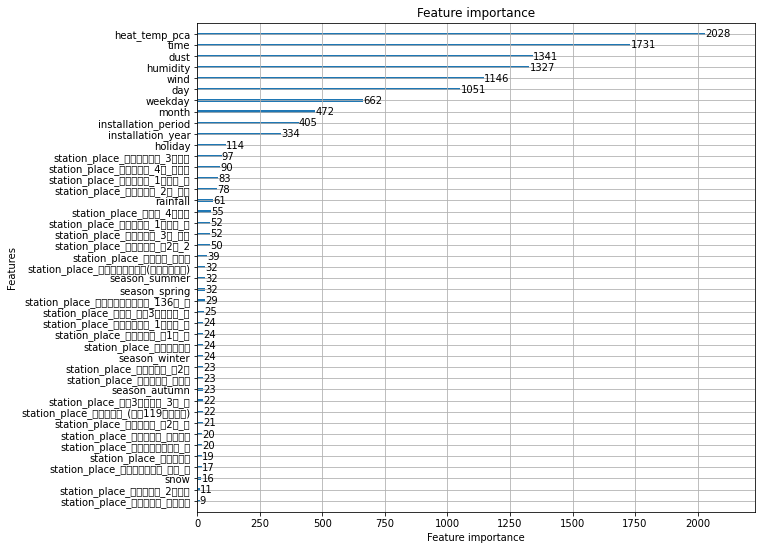

In [40]:
## Plot importance
from lightgbm import plot_importance

plot_importance(lgbm,figsize=(10,9))

## 함수로 만들기

### 전처리 함수
- 동 걸러내기
- 지울 칼럼들 지우기
- scaling : ['month','day','time','rainfall','dust','wind','humidity','snow','temp','heat']
- PCA : heat, temp 칼럼에 대해서 n_components=1 or 2 (열지수와 온도 상관계수 ; 0.95 이상)
  > n_components=1일 때 explained_variance_ratio가 0.95를 넘지 못한다면 n_components=2로 설정해 차원 축소 진행
- correlation 출력
- dummies : ['season','holiday','station_place','weekday']

In [41]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def geoncheri(data,dong):
  data1=data[data['dong']==dong]
  data1.drop(['station_num','station_name','place','latitude','longitude','installation_date','dong'],axis=1,inplace=True)

  ## Scaling, Dummies에 쓸 피처들
  numerical=['month','day','time','rainfall','dust','wind','humidity','snow','temp','heat']
  categorical=['season','holiday','station_place','weekday']

  ## Scaling
  scaler=StandardScaler()
  data1[numerical]=scaler.fit_transform(data1[numerical])
  print('Scaling Complete')
  print("=================================================")

  ## PCA with heat & temp
  pca=PCA(n_components=1)
  heat_temp_pca=pca.fit_transform(data1[['heat','temp']])
  print('PCA with n_component=1')
  print("Principal component variance | {}".format(pca.explained_variance_ratio_))
  if pca.explained_variance_ratio_<=0.95:
    pca=PCA(n_components=1)
    heat_temp_pca=pca.fit_transform(data1[['heat','temp']])
  data1.drop(['heat','temp'],axis=1,inplace=True)
  data1['heat_temp_pca']=heat_temp_pca
  print('PCA Complete')
  print("==================================================")

  ## Correlation print
  print("Correlation")
  print(data1.corr().loc['target'])
  print("==================================================")

  ## Dummies
  dummies=pd.get_dummies(data1[categorical])
  data1.drop(categorical,axis=1,inplace=True)
  data1[dummies.columns]=dummies
  print('Dummies Complete')
  print("==================================================")

  return data1

### 훈련, 예측 함수
- input : 전처리한 데이터
- output : fitting된 모델
- LGBM hyperparameters

              `bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=91, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=240, n_jobs=-1, num_leaves=50, objective=None,
              random_state=42, reg_alpha=0.2, reg_lambda=0.01, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0`
> Hyperparameter 설명
  - bagging_fraction과 bagging_freq을 설정해 bagging을 진행함.
    - bagging_fraction(subsample) : iteration을 도는 동안 tree별로 사용할 row의 percentage를 결정 -> 각 tree마다 fitting될 row를 랜덤하게 선택해 generalization을 향상
    - bagging_freq : 설정한 값만큼의 iteration동안 bagging 진행함 -> 여기서는 bagging_freq=5로 설정해, 5번의 iteration동안 bagging_fraction*100 만큼의 데이터를 랜덤하게 골라 bagging을 진행한 데이터로 훈련 진행
  - feature_fraction : 각 tree마다 사용할 feature들의 subset을 랜덤하게 선택
  - max_depth : model performance에 좋음 (-1로 설정해 limit을 두지 않음)
  - min_child_samples : leaf에 필요한 최소한의 데이터 개수
  - min_chid_weight : leaf에 필요한 instance weight (Hessian)의 최소한의 합
  - min_split_gain : leaf node를 더 분리할때 만족해야할 최소한의 loss reduction
  - reg_alpha : L1 regularization
  - reg_lamba : L2 regularization
  - num_leaves : 총 50개만 갖도록 함. lgbm 훈련에 있어 max_depth보다 더 영향을 주기 때문에 max_depth는 설정하지 않고 num_leaves만 설정
  - learning_rate
  - n_estimators : 훈련해야할 boosted tree의 개수


In [42]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from lightgbm import plot_importance

def train_predict(data):
  ## train, test split
  X=data.drop(['target'],axis=1)
  y=data['target']
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=121)

  ## LGBMRegressor train
  lgbm=lgb.LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=91, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=240, n_jobs=-1, num_leaves=50, objective=None,
              random_state=42, reg_alpha=0.2, reg_lambda=0.01, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0).fit(X_train,y_train)

  print("Train Score | {}".format(lgbm.score(X_train,y_train)))

  ## Prediction
  predict=lgbm.predict(X_test)
  print("RMSE | {}".format(np.sqrt(mean_squared_error(predict,y_test))))
  print("R2 score | {}".format(r2_score(y_test,predict)))

  ## Plot importance
  plot_importance(lgbm,figsize=(10,9))

  return lgbm

In [44]:
data=pd.read_csv("/content/drive/MyDrive/딥인치즈/Data/f5.csv")

In [45]:
data['dong'].unique()

array(['가락동', '거여동', '마천동', '문정동', '방이동', '삼전동', '송파동', '신천동', '오금동',
       '잠실동', '장지동', '풍납동', '석촌동'], dtype=object)

Scaling Complete
PCA with n_component=1
Principal component variance | [0.9790956]
PCA Complete
Correlation
month            0.040074
day             -0.007125
time             0.275495
rainfall        -0.044973
dust             0.007611
wind             0.076192
humidity        -0.115439
snow            -0.050109
holiday          0.031033
weekday          0.026129
target           1.000000
heat_temp_pca   -0.214339
Name: target, dtype: float64
Dummies Complete
Train Score | 0.616384142239008
RMSE | 1.61004750571978
R2 score | 0.5539386656618357


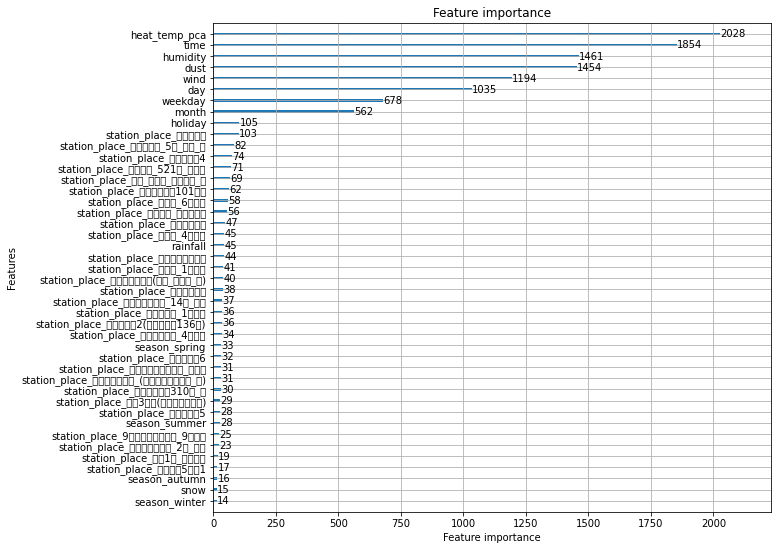

In [46]:
## 잠실동
data_gamsil=geoncheri(data,'잠실동')
lgbm_gamsil=train_predict(data_gamsil)


가락동 Train and Predict....
Scaling Complete
PCA with n_component=1
Principal component variance | [0.97897138]
PCA Complete
Correlation
month            0.027896
day             -0.004260
time             0.169568
rainfall        -0.036290
dust             0.015236
wind             0.058643
humidity        -0.077545
snow            -0.039290
holiday         -0.075388
weekday         -0.052074
target           1.000000
heat_temp_pca   -0.153977
Name: target, dtype: float64
Dummies Complete
Train Score | 0.5765146209658694
RMSE | 1.3392867350182276
R2 score | 0.48307448297775046

거여동 Train and Predict....
Scaling Complete
PCA with n_component=1
Principal component variance | [0.97926306]
PCA Complete
Correlation
month            0.032066
day             -0.006497
time             0.151070
rainfall        -0.035935
dust             0.001162
wind             0.048162
humidity        -0.053142
snow            -0.042363
holiday         -0.037129
weekday         -0.026600
target           1.0

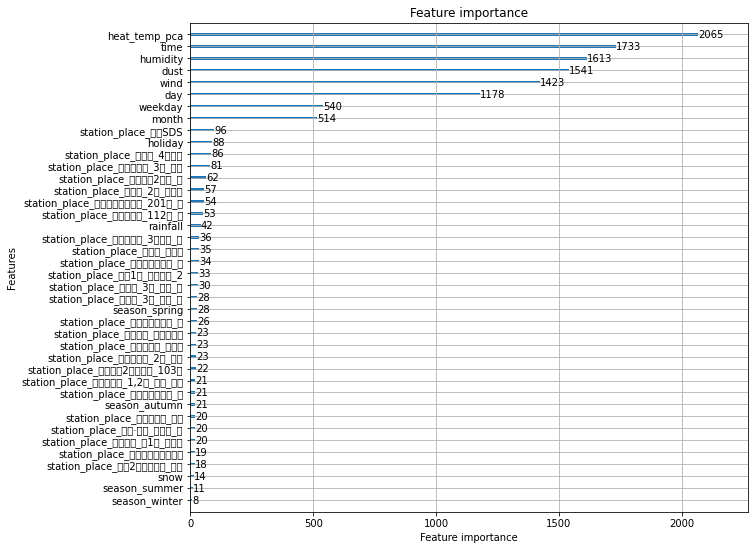

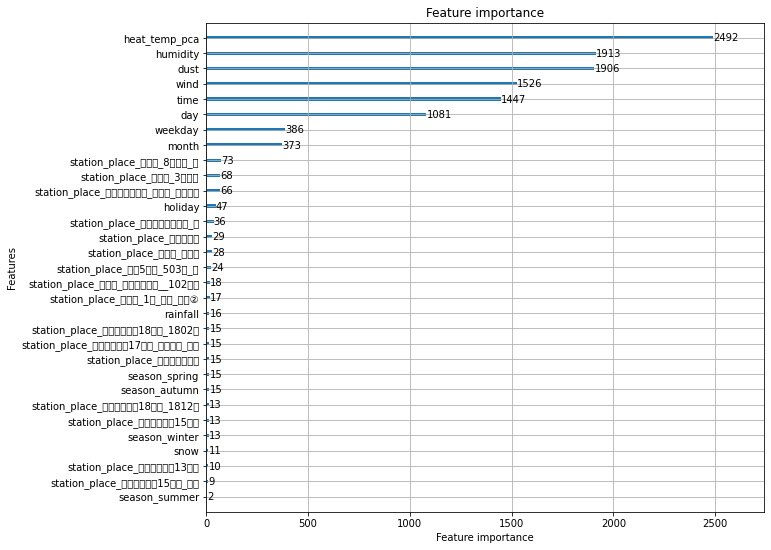

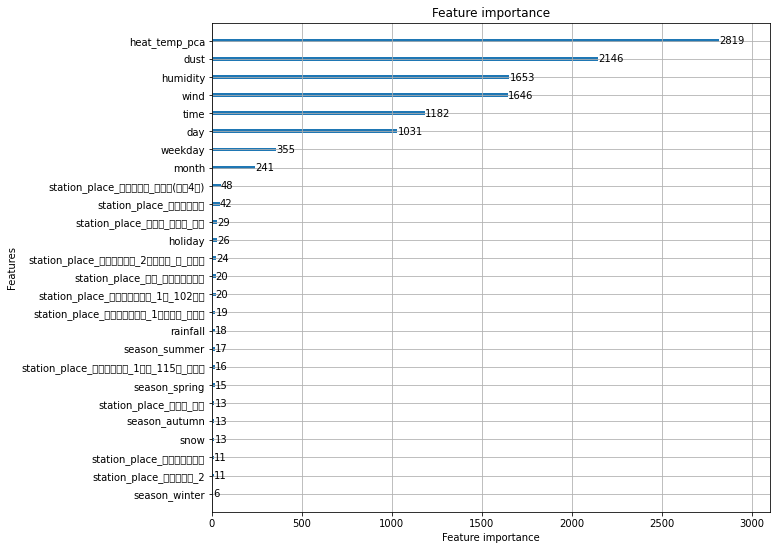

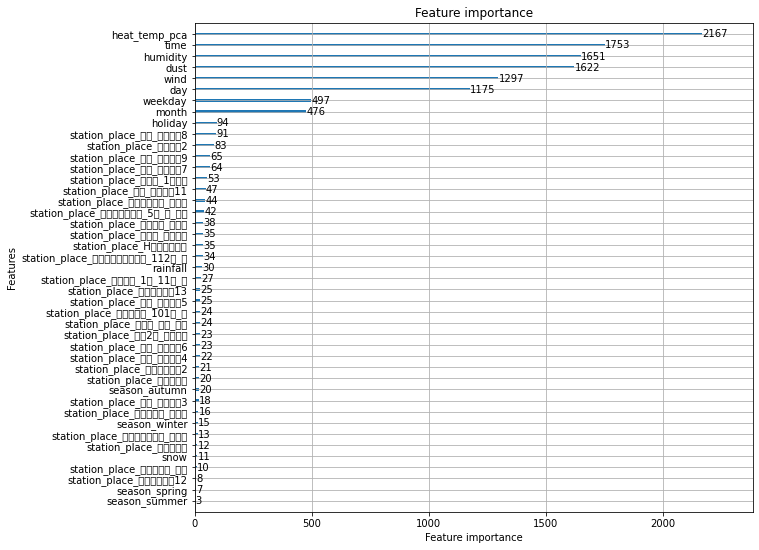

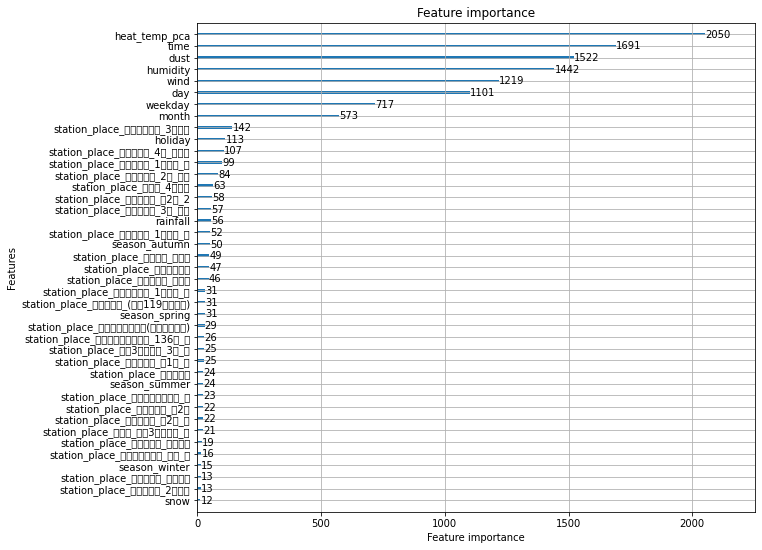

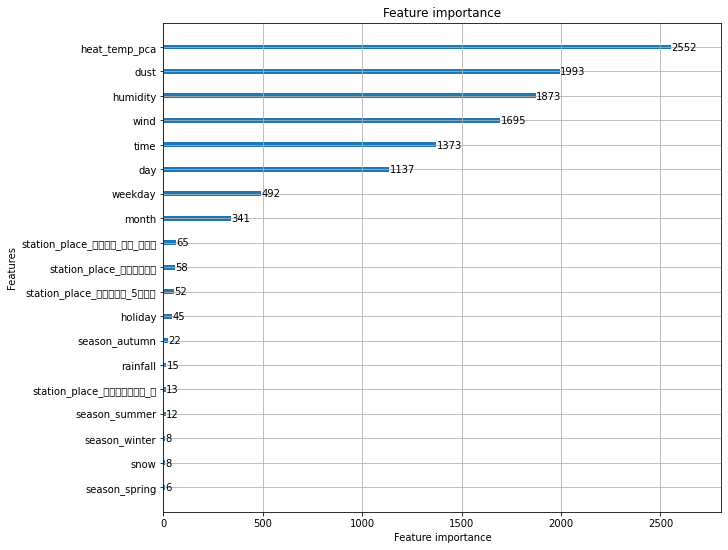

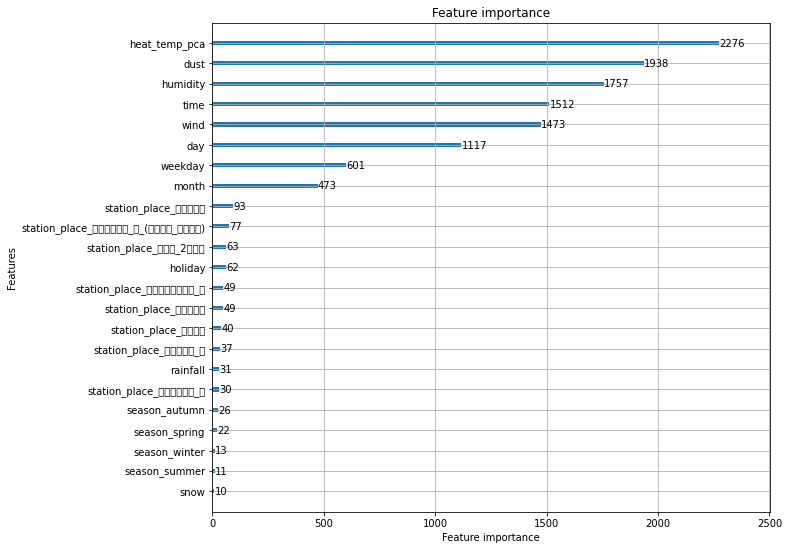

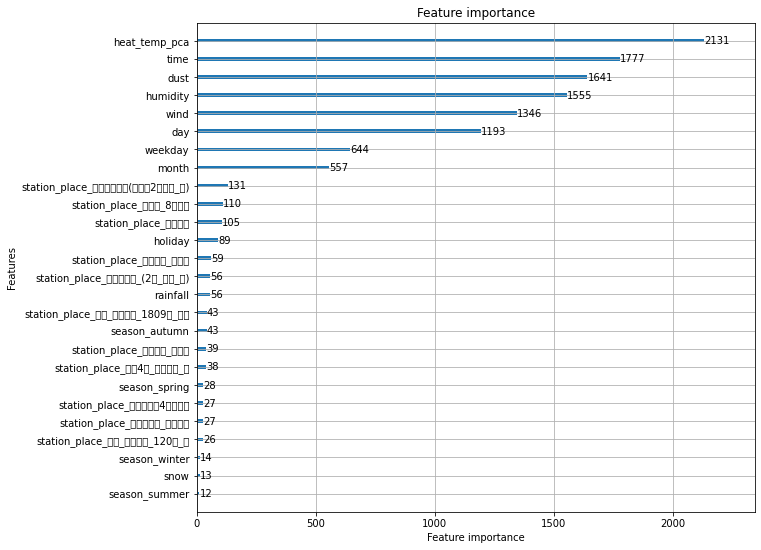

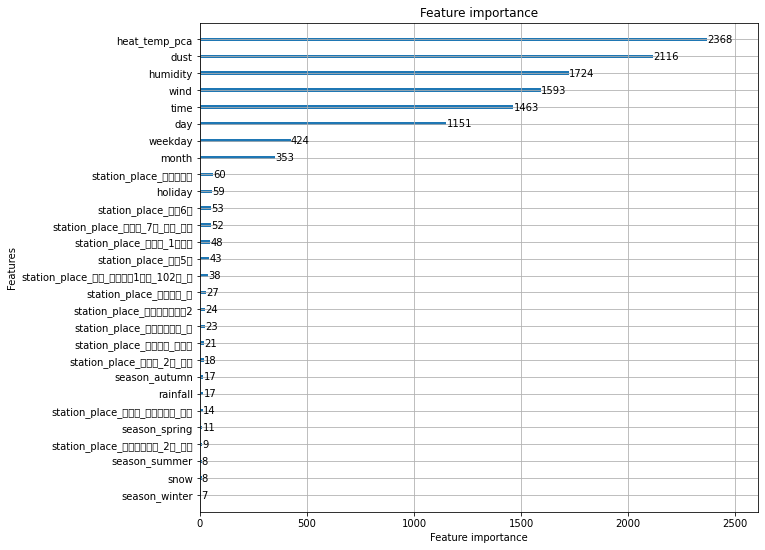

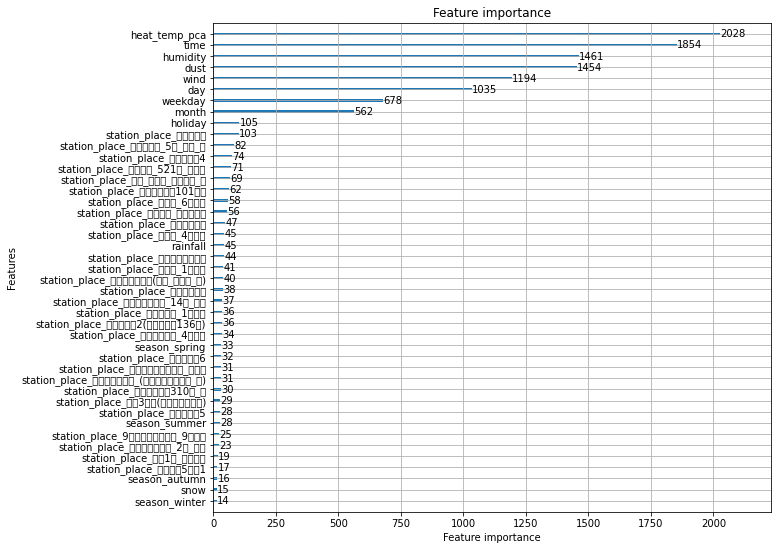

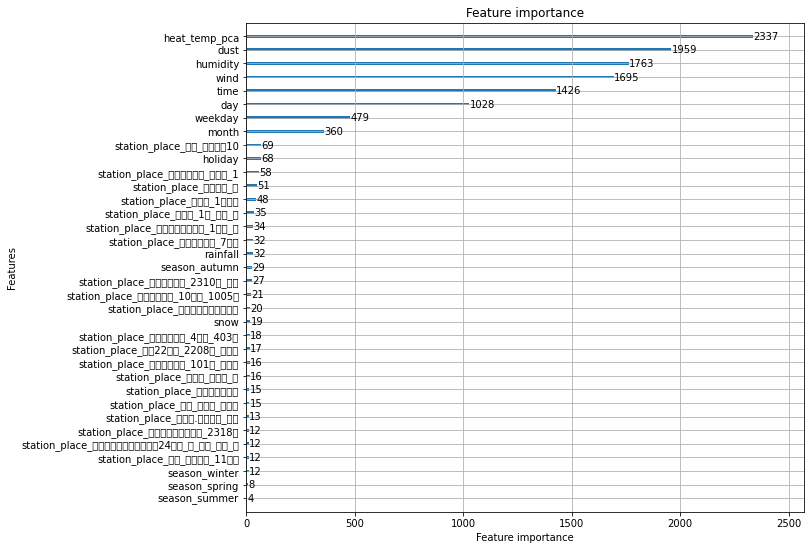

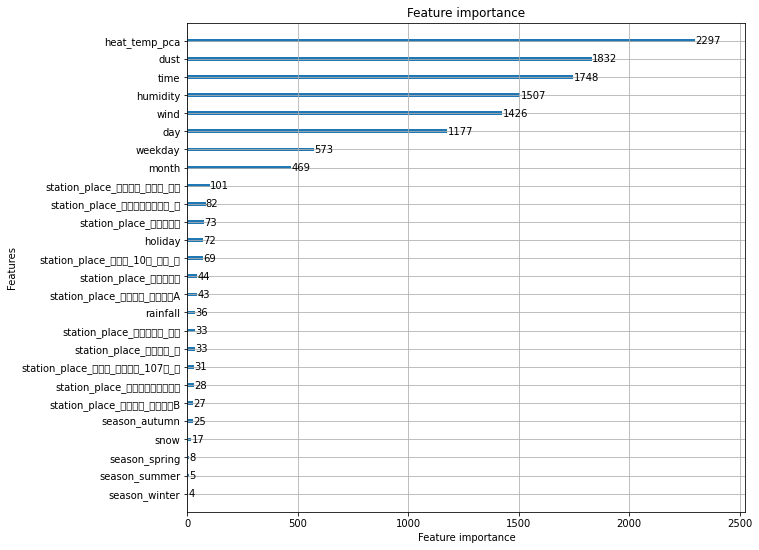

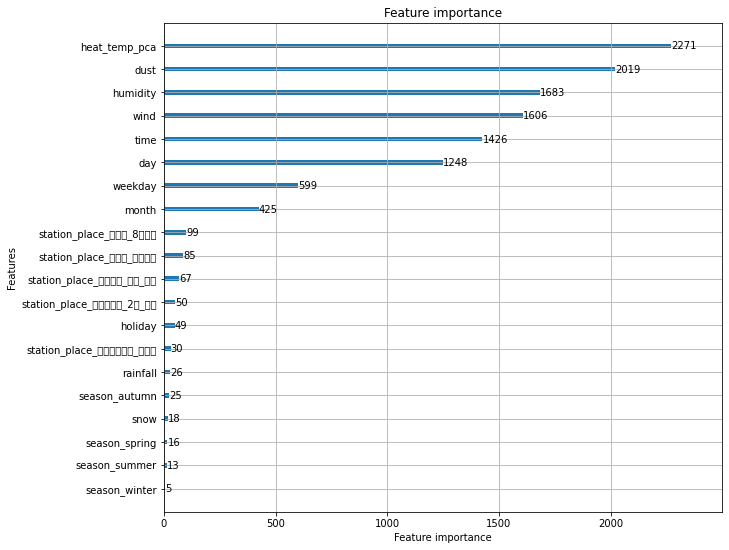

In [47]:
## 전체 돌려보기
for dong in list(data['dong'].unique()):
  print()
  print("{} Train and Predict....".format(dong))
  data1=geoncheri(data,dong)
  train_predict(data1)

## LGBM 사용하는 이유

**[LGBMRegressor]**
- lightgbm은 leaf-wise tree growth를 이용해 비대칭적 트리를 형성하기 때문에, 균형 잡기 위한 연산을 진행하지 않는다.
- decision tree가 데이터에서 패턴을 찾아 예측을 진행함
> 우리나라의 날씨는 사계절이 뚜렷하고, 대여소 위치에 따른 지역 특성이 모두 다르기 때문에 tree 형태의 모델을 사용하는 것이 적합하다고 판단됨. 이에 다양한 트리 형태들 중에서도 예측 성능이 좋다고 알려진 LGBMRegressor을 선택함.

### LGBMRegressor이 적합한 이유

In [48]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,850 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

In [50]:
import numpy as np
import pandas as pd

In [51]:
data=pd.read_csv("/content/drive/MyDrive/딥인치즈/Data/f5.csv")
data.head()

,month,day,season,time,rainfall,dust,dong,wind,humidity,snow,...,weekday,heat,station_num,station_name,station_place,place,latitude,longitude,installation_date,target
0,1,1,winter,0,0.0,23.0,가락동,1.9,41.0,0.0,...,5.0,-4.76,4453,위례중앙푸르지오 201동 앞,위례중앙푸르지오 201동 앞,위례광장로 290,37.474346,127.143265,2020-12-30,1
1,1,1,winter,0,0.0,23.0,거여동,1.9,41.0,0.0,...,5.0,-4.76,1227,거여역 8번출구 뒤,거여역 8번출구 뒤,서울특별시 송파구 오금로 지하 499,37.493126,127.143822,2017-06-27,1
2,1,1,winter,0,0.0,23.0,거여동,1.9,41.0,0.0,...,5.0,-4.76,4895,위례포레샤인15단지 상가,위례포레샤인15단지 상가,송파구 거여동 604,37.486416,127.142059,2021-11-10,1
3,1,1,winter,0,0.0,23.0,마천동,1.9,41.0,0.0,...,5.0,-4.76,2642,마천동 성내천 쉼터,마천동 성내천 쉼터,성내천로 179,37.501495,127.147781,2020-01-15,1
4,1,1,winter,0,0.0,23.0,문정동,1.9,41.0,0.0,...,5.0,-4.76,1244,문정 법조단지8,문정 법조단지8,서울특별시 송파구 법원로 101,37.481537,127.122124,2017-06-27,1


### 방이동만

In [52]:
## 방이동만

data1=data[data['dong']=='방이동']
data1.shape

(109580, 22)

#### 대여소별 일자별 이용건수
> 동별로 별 차이가 있지 않음...

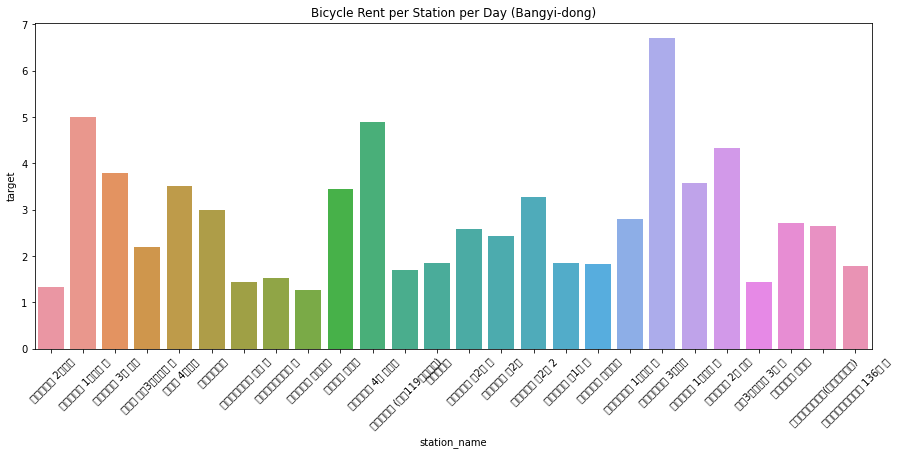

In [53]:
## 대여소별 일자별 이용건수

import matplotlib.pyplot as plt
import seaborn as sns

station_target_sum=data1.groupby(['station_name'],as_index=False)['target'].mean()
plt.figure(figsize=(15,6))
plot=sns.barplot(x='station_name',y='target',data=station_target_sum)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
plt.title("Bicycle Rent per Station per Day (Bangyi-dong)")
plt.show()

#### 특정 기온에 따른 일자별 평균 이용건수
- 27도 이상을 기준으로 분리

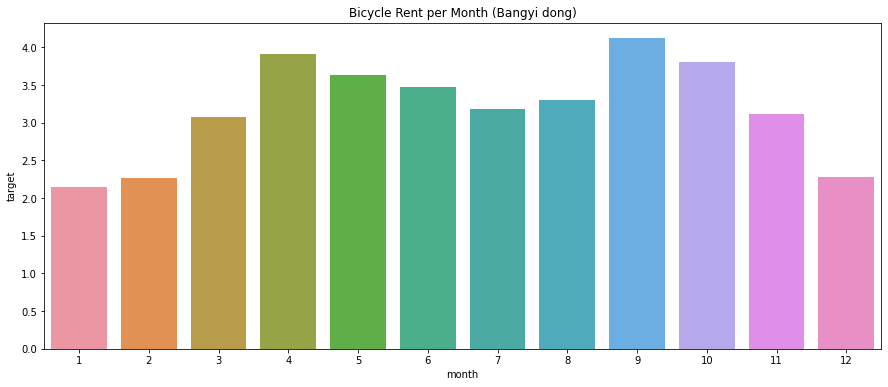

In [54]:
## 월별 하루 평균 이용건수 | 날씨가 선선한 9, 10월 평균 이용건수가 가장 높다. > 기온이 영향을 미칠 것

temp=data1.groupby(['month'],as_index=False)['target'].mean()
plt.figure(figsize=(15,6))
plot=sns.barplot(x='month',y='target',data=temp)
plot.set_xticklabels(plot.get_xticklabels())
plt.title("Bicycle Rent per Month (Bangyi dong)")
plt.show()

In [55]:
## 특정 기온

temp=data1[['month','day','temp','target']]
temp[['temp']].describe()

,temp
count,109580.000000
mean,15.073487
std,10.683281
min,-15.400000
25%,6.800000
50%,16.500000
75%,23.900000
max,36.300000


### 송파구 대상으로 (오늘 줌미팅때 이후로 어디에 포인트 맞춰야하는지 혼동옴)

#### 동별 이용건수 총합
> 각 동이 갖고 있는 특성으로 인해 동별 이용건수 간 차이가 심하다.
  - 방이동
  - 잠실동

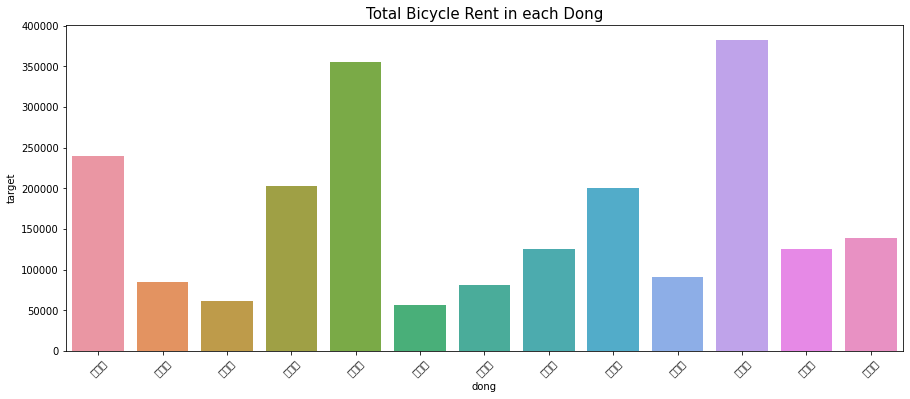

In [56]:
## 동별 일자별 이용건수

import matplotlib.pyplot as plt
import seaborn as sns

temp=data.groupby(['dong'],as_index=False)['target'].sum()
plt.figure(figsize=(15,6))
plot=sns.barplot(x='dong',y='target',data=temp)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
plt.title("Total Bicycle Rent in each Dong",size=15)
plt.show()

#### 날씨에 따른 이용건수 비교

##### 기온 & 이용건수
송파구 7월 평균기온인 29도보다 높거나 12월 평균기온인 4도보다 낮은 기온일 때에는 그외의 기온일 때보다 따릉이 이용건수가 적다.
> - 기온, 그리고 기온을 결정하는 월 피처가 모델 예측에 있어 중요한 역할을 할 것임.
- 또한, 기온에 따른 이용건수 패턴을 확인할 수 있기 때문에 decision tree에 적합하다는 것을 재확인.

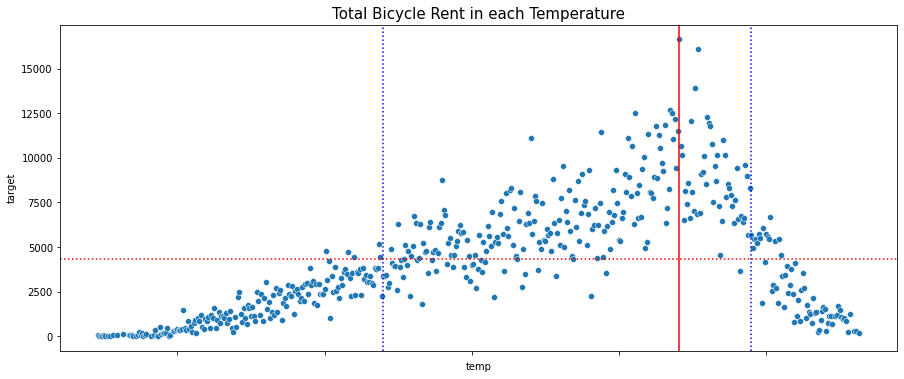

In [57]:
## 기온 & 이용건수

temp=data.groupby(['temp'],as_index=False)['target'].sum()
plt.figure(figsize=(15,6))
plot=sns.scatterplot(x='temp',y='target',data=temp)
plt.axvline(x=29,color='blue',linestyle=':') ## 7월 평균 기온
plt.axvline(x=4,color='blue',linestyle=':') ## 12월 평균 기온
plt.axvline(x=temp.iloc[temp['target'].argmax()]['temp'],color='red',linestyle='-') ## 이용건수 최대인 날의 기온 : 25.4
plt.axhline(temp['target'].mean(),color='red',linestyle=':') ## 이용건수 평균
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
plt.title("Total Bicycle Rent in each Temperature",size=15)
plt.show()

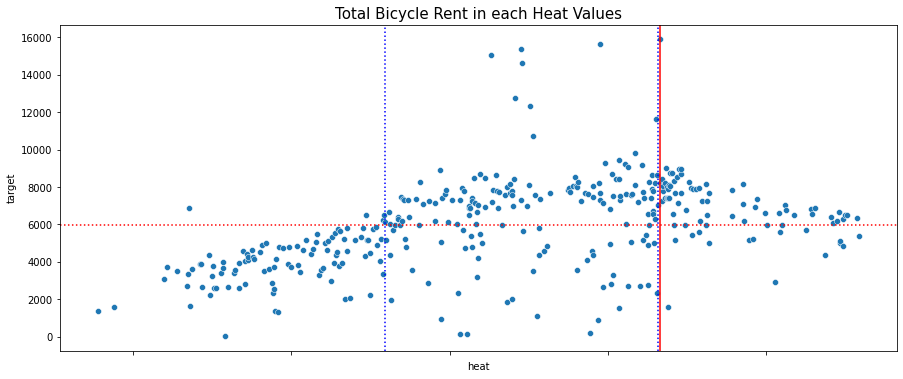

In [58]:
## 열지수 & 이용건수

temp=data.groupby(['heat'],as_index=False)['target'].sum()
plt.figure(figsize=(15,6))
plot=sns.scatterplot(x='heat',y='target',data=temp)
plt.axvline(x=5.95,color='blue',linestyle=':')
plt.axvline(x=23.17,color='blue',linestyle=':')
plt.axvline(x=temp.iloc[temp['target'].argmax()]['heat'],color='red',linestyle='-')
plt.axhline(temp['target'].mean(),color='red',linestyle=':') ## 이용건수 평균
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
plt.title("Total Bicycle Rent in each Heat Values",size=15)
plt.show()

In [59]:
data['heat'].describe()

count    811018.000000
mean         14.422996
std          10.893998
min         -12.240000
25%           5.950000
50%          14.530000
75%          23.170000
max          35.860000
Name: heat, dtype: float64

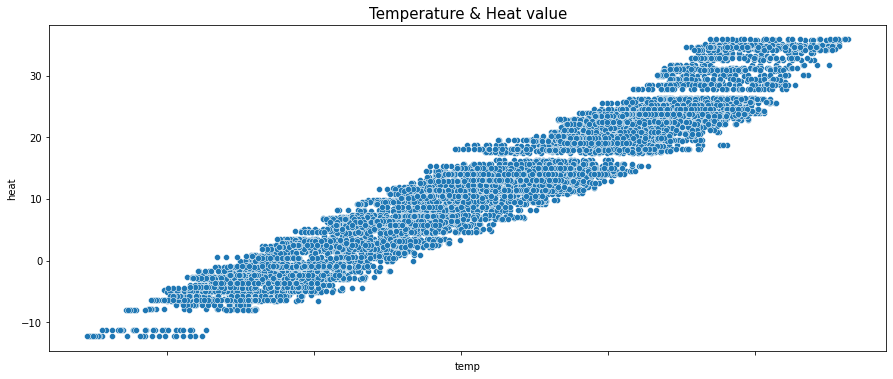

In [60]:
## heat & temp

temp=data[['heat','temp']].drop_duplicates().reset_index(drop=True)
plt.figure(figsize=(15,6))
plot=sns.scatterplot(x='temp',y='heat',data=temp)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
plt.title("Temperature & Heat value",size=15)
plt.show()

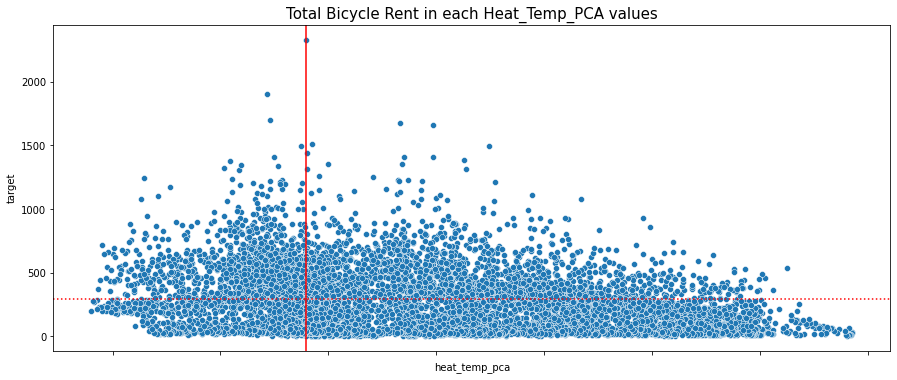

In [61]:
## heat_temp_pca & 이용건수
from sklearn.decomposition import PCA

pca=PCA(n_components=1)
temp=data.groupby(['heat','temp'],as_index=False)['target'].sum()
heat_temp_pca=pca.fit_transform(temp[['heat','temp']])
temp.drop(['heat','temp'],axis=1,inplace=True)
temp['heat_temp_pca']=heat_temp_pca

plt.figure(figsize=(15,6))
plot=sns.scatterplot(x='heat_temp_pca',y='target',data=temp)
# plt.axvline(x=29,color='blue',linestyle=':') 
# plt.axvline(x=4,color='blue',linestyle=':')
plt.axvline(x=temp.iloc[temp['target'].argmax()]['heat_temp_pca'],color='red',linestyle='-')
plt.axhline(temp['target'].mean(),color='red',linestyle=':') ## 이용건수 평균
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
plt.title("Total Bicycle Rent in each Heat_Temp_PCA values",size=15)
plt.show()

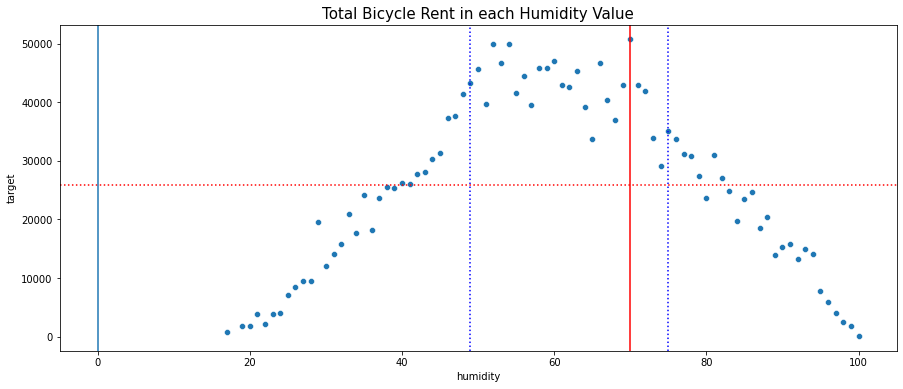

In [62]:
## 습도 & 이용건수

temp=data.groupby(['humidity'],as_index=False)['target'].sum()
plt.figure(figsize=(15,6))
plot=sns.scatterplot(x='humidity',y='target',data=temp)
plt.axvline(x=49,linestyle=':',color='blue') ## Q1
plt.axvline(x=75,linestyle=':',color='blue') ## Q3
plt.axvline(x=temp.iloc[temp['target'].argmax()]['humidity'],color='red',linestyle='-')
plt.axhline(temp['target'].mean(),color='red',linestyle=':') ## 이용건수 평균
plt.axvline()
plt.title('Total Bicycle Rent in each Humidity Value',size=15)
plt.show()

In [63]:
data['humidity'].describe()

count    811018.000000
mean         61.687686
std          17.519830
min          17.000000
25%          49.000000
50%          62.000000
75%          75.000000
max         100.000000
Name: humidity, dtype: float64

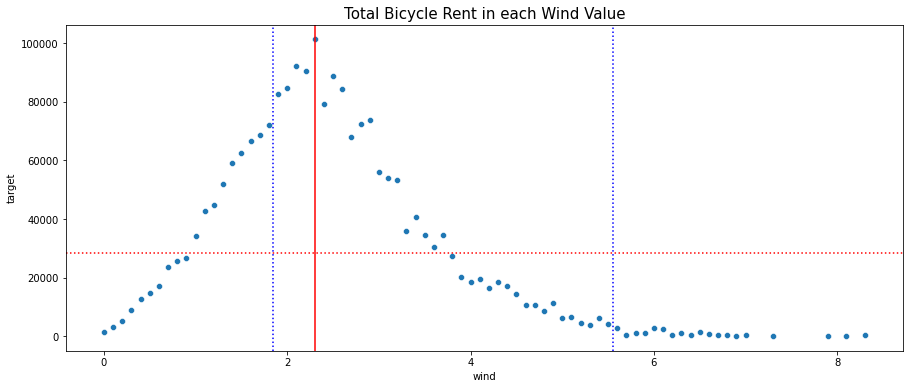

In [64]:
## 바람 & 이용건수

temp=data.groupby(['wind'],as_index=False)['target'].sum()
plt.figure(figsize=(15,6))
plot=sns.scatterplot(x='wind',y='target',data=temp)
plt.axvline(x=1.85,linestyle=':',color='blue') ## Q1
plt.axvline(x=5.55,linestyle=':',color='blue') ## Q3
plt.axvline(x=temp.iloc[temp['target'].argmax()]['wind'],color='red',linestyle='-')
plt.axhline(temp['target'].mean(),color='red',linestyle=':') ## 이용건수 평균
plt.title('Total Bicycle Rent in each Wind Value',size=15)
plt.show()

In [65]:
temp['wind'].describe()

count    75.000000
mean      3.734667
std       2.242314
min       0.000000
25%       1.850000
50%       3.700000
75%       5.550000
max       8.300000
Name: wind, dtype: float64

## 결과 해석

### LGBM 시각화

In [66]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/딥인치즈/Data/f5.csv")

Scaling Complete
PCA with n_component=1
Principal component variance | [0.9790956]
PCA Complete
Correlation
month            0.040074
day             -0.007125
time             0.275495
rainfall        -0.044973
dust             0.007611
wind             0.076192
humidity        -0.115439
snow            -0.050109
holiday          0.031033
weekday          0.026129
target           1.000000
heat_temp_pca   -0.214339
Name: target, dtype: float64
Dummies Complete
Train Score | 0.616384142239008
RMSE | 1.61004750571978
R2 score | 0.5539386656618357


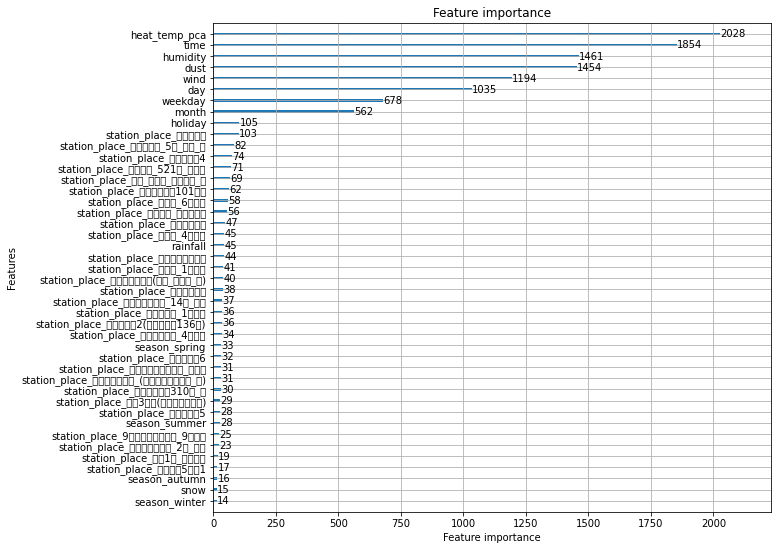

In [67]:
## 잠실동
data_gamsil=geoncheri(data,'잠실동')
lgbm_gamsil=train_predict(data_gamsil)

In [68]:
import graphviz
lgb.create_tree_digraph(lgbm_gamsil).render('/content/drive/MyDrive/딥인치즈/Data/하경_기온 데이터/lgbm_gamsil', format='png')

'/content/drive/MyDrive/딥인치즈/Data/하경_기온 데이터/lgbm_gamsil.png'

Scaling Complete
PCA with n_component=1
Principal component variance | [0.97895915]
PCA Complete
Correlation
month            0.051422
day             -0.010812
time             0.236250
rainfall        -0.037897
dust             0.003033
wind             0.072619
humidity        -0.115815
snow            -0.044411
holiday          0.042591
weekday          0.032481
target           1.000000
heat_temp_pca   -0.183003
Name: target, dtype: float64
Dummies Complete
Train Score | 0.7251707869402177
RMSE | 1.746225599636046
R2 score | 0.6523604717895366


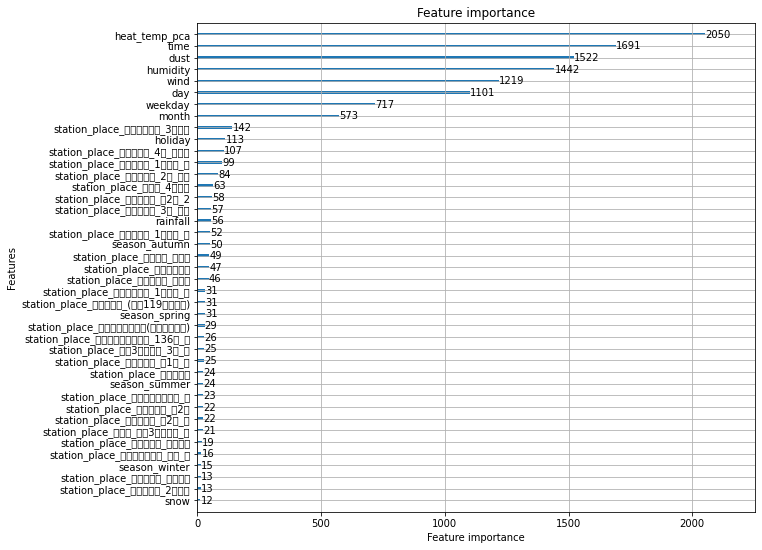

In [69]:
## 방이동
data_bangyi=geoncheri(data,'방이동')
lgbm_bangyi=train_predict(data_bangyi)

In [70]:
lgb.create_tree_digraph(lgbm_bangyi).render("/content/drive/MyDrive/딥인치즈/Data/하경_기온 데이터/lgbm_tree/lgbm_bangyi",format='png')

'/content/drive/MyDrive/딥인치즈/Data/하경_기온 데이터/lgbm_tree/lgbm_bangyi.png'

## Loss 구하기

In [71]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def geoncheri(data,dong):
  data1=data[data['dong']==dong]
  data1.drop(['station_place','station_name','place','latitude','longitude','installation_date','dong'],axis=1,inplace=True)

  ## Scaling, Dummies에 쓸 피처들
  numerical=['rainfall','dust','wind','humidity','snow','temp','heat']
  categorical=['season','holiday','weekday']

  ## Label encoder ; month, day, time, station_num
  encoder=LabelEncoder()
  data1['month_encode']=encoder.fit_transform(data1['month'])
  data1['day_encode']=encoder.fit_transform(data1['day'])
  data1['time_encode']=encoder.fit_transform(data1['time'])
  data1['station_num_encode']=encoder.fit_transform(data1['station_num'])
  data1.drop(['month','day','time','station_num'],axis=1,inplace=True)


  ## Scaling
  scaler=StandardScaler()
  data1[numerical]=scaler.fit_transform(data1[numerical])
  print('Scaling Complete')
  print("=================================================")

  ## PCA with heat & temp
  pca=PCA(n_components=1)
  heat_temp_pca=pca.fit_transform(data1[['heat','temp']])
  print('PCA with n_component=1')
  print("Principal component variance | {}".format(pca.explained_variance_ratio_))
  if pca.explained_variance_ratio_<=0.95:
    pca=PCA(n_components=1)
    heat_temp_pca=pca.fit_transform(data1[['heat','temp']])
  data1.drop(['heat','temp'],axis=1,inplace=True)
  data1['heat_temp_pca']=heat_temp_pca
  print('PCA Complete')
  print("==================================================")

  ## Correlation print
  print("Correlation")
  print(data1.corr().loc['target'])
  print("==================================================")

  ## Dummies
  dummies=pd.get_dummies(data1[categorical])
  data1.drop(categorical,axis=1,inplace=True)
  data1[dummies.columns]=dummies
  print('Dummies Complete')
  print("==================================================")

  return data1

In [72]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from lightgbm import plot_importance

def predict_data(data):
  ## train, test split
  X=data.drop(['target'],axis=1)
  y=data['target']
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=121)

  ## LGBMRegressor train
  lgbm=lgb.LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=91, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=240, n_jobs=-1, num_leaves=50, objective=None,
              random_state=42, reg_alpha=0.2, reg_lambda=0.01, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0).fit(X_train,y_train)

  print("Train Score | {}".format(lgbm.score(X_train,y_train)))

  ## Prediction
  predict=lgbm.predict(X_test)
  print("RMSE | {}".format(np.sqrt(mean_squared_error(predict,y_test))))
  print("R2 score | {}".format(r2_score(y_test,predict)))

  ## Predicted
  test_data=pd.DataFrame(X_test)
  test_data['test']=y_test
  test_data['predicted']=predict
  test_data['L1_loss']=abs(y_test-predict)

  ## Trained
  train_data=pd.DataFrame(X_train)
  train_data['target']=y_train

  ## Plot importance
  ## plot_importance(lgbm,figsize=(10,9))

  return lgbm,train_data,test_data

### 방이동

In [73]:
data=pd.read_csv("/content/drive/MyDrive/딥인치즈/Data/f5.csv")

In [74]:
f5[(f5['month']==4)&(f5['day']==28)&(f5['time']==19)&(f5['dong']=='잠실동')]['target']

245532     2
245533     4
245534    22
245535    26
245536    20
245537    18
245538    16
245539     4
245540     6
245541    14
245542    16
245543     4
245544     8
245545     8
245546     2
245547    16
245548    16
245549     4
245550     6
245551     6
245552     4
245553     6
245554     8
245555    18
Name: target, dtype: int64

In [75]:
data_bangyi=geoncheri(data,'방이동')

Scaling Complete
PCA with n_component=1
Principal component variance | [0.97895915]
PCA Complete
Correlation
rainfall             -0.037897
dust                  0.003033
wind                  0.072619
humidity             -0.115815
snow                 -0.044411
holiday               0.042591
weekday               0.032481
target                1.000000
month_encode          0.051422
day_encode           -0.010812
time_encode           0.236250
station_num_encode   -0.014001
heat_temp_pca        -0.183003
Name: target, dtype: float64
Dummies Complete


In [76]:
data_bangyi

,rainfall,dust,wind,humidity,snow,target,month_encode,day_encode,time_encode,station_num_encode,heat_temp_pca,holiday,weekday,season_autumn,season_spring,season_summer,season_winter
7,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,2,0,0,0,11,2.820194,1,5.0,0,0,0,1
8,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,1,0,0,0,14,2.820194,1,5.0,0,0,0,1
9,-0.064305,-0.503561,-0.440241,-1.189104,-0.078714,2,0,0,0,23,2.820194,1,5.0,0,0,0,1
39,-0.064305,-0.450350,-0.531777,-1.132034,-0.078714,1,0,0,1,11,2.866526,1,5.0,0,0,0,1
40,-0.064305,-0.450350,-0.531777,-1.132034,-0.078714,2,0,0,1,18,2.866526,1,5.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810953,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,1,11,30,22,16,2.865960,0,4.0,0,0,0,1
810954,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,1,11,30,22,4,2.865960,0,4.0,0,0,0,1
810955,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,1,11,30,22,22,2.865960,0,4.0,0,0,0,1
810956,-0.064305,-0.423745,0.566659,-1.417386,-0.078714,2,11,30,22,23,2.865960,0,4.0,0,0,0,1


In [77]:
lgbm_bangyi,train_bangyi,test_bangyi=predict_data(data_bangyi)

Train Score | 0.7276318562116002
RMSE | 1.7396238404996067
R2 score | 0.6549840665258218


In [78]:
test_bangyi.sort_values(['L1_loss'],ascending=False)

,rainfall,dust,wind,humidity,snow,month_encode,day_encode,time_encode,station_num_encode,heat_temp_pca,holiday,weekday,season_autumn,season_spring,season_summer,season_winter,test,predicted,L1_loss
625236,-0.064305,-0.503561,0.566659,0.523008,-0.078714,9,10,16,13,-0.192086,0,0.0,1,0,0,0,29,13.470075,15.529925
134691,-0.064305,1.305594,0.200514,-1.417386,-0.078714,2,8,14,5,0.594688,0,2.0,0,1,0,0,22,7.756938,14.243062
663230,-0.064305,0.906516,0.200514,-0.390119,-0.078714,9,25,16,13,-0.072219,0,1.0,1,0,0,0,24,10.159974,13.840026
135041,-0.064305,1.598251,0.841268,-1.303245,-0.078714,2,8,16,13,0.561593,0,2.0,0,1,0,0,27,13.608603,13.391397
314167,-0.064305,0.055149,-0.714850,0.123515,-0.078714,4,30,18,6,-0.889280,0,0.0,0,1,0,0,24,11.173144,12.826856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643786,-0.064305,0.401016,-1.630213,1.835627,-0.078714,9,18,7,8,0.536368,0,1.0,1,0,0,0,2,1.999540,0.000460
167406,-0.064305,-0.370535,-0.623313,0.751289,-0.078714,2,23,8,22,1.069520,0,3.0,0,1,0,0,5,4.999663,0.000337
788642,-0.064305,-0.423745,-0.074095,1.150782,9.473987,11,19,7,21,1.611353,0,0.0,0,0,0,1,1,1.000176,0.000176
738120,-0.064305,-0.264114,-0.257168,0.351796,-0.078714,10,25,18,9,1.486331,0,4.0,1,0,0,0,2,2.000168,0.000168


In [79]:
test_bangyi.L1_loss.describe()

count    21916.000000
mean         1.233296
std          1.226923
min          0.000092
25%          0.398190
50%          0.879782
75%          1.655464
max         15.529925
Name: L1_loss, dtype: float64

In [80]:
## Q3 이상만 뽑기
bangyi_75=test_bangyi[test_bangyi['L1_loss']>=1.655464]
bangyi_75.sort_values(['L1_loss'],ascending=False)

,rainfall,dust,wind,humidity,snow,month_encode,day_encode,time_encode,station_num_encode,heat_temp_pca,holiday,weekday,season_autumn,season_spring,season_summer,season_winter,test,predicted,L1_loss
625236,-0.064305,-0.503561,0.566659,0.523008,-0.078714,9,10,16,13,-0.192086,0,0.0,1,0,0,0,29,13.470075,15.529925
134691,-0.064305,1.305594,0.200514,-1.417386,-0.078714,2,8,14,5,0.594688,0,2.0,0,1,0,0,22,7.756938,14.243062
663230,-0.064305,0.906516,0.200514,-0.390119,-0.078714,9,25,16,13,-0.072219,0,1.0,1,0,0,0,24,10.159974,13.840026
135041,-0.064305,1.598251,0.841268,-1.303245,-0.078714,2,8,16,13,0.561593,0,2.0,0,1,0,0,27,13.608603,13.391397
314167,-0.064305,0.055149,-0.714850,0.123515,-0.078714,4,30,18,6,-0.889280,0,0.0,0,1,0,0,24,11.173144,12.826856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19982,-0.064305,-0.077877,-0.440241,-0.218908,-0.078714,0,9,21,0,1.832971,0,0.0,0,0,0,1,1,2.656095,1.656095
179238,-0.064305,-0.290719,0.108977,-0.333048,-0.078714,2,28,8,9,0.997059,0,1.0,0,1,0,0,1,2.655798,1.655798
205397,-0.064305,0.401016,1.115877,-1.759808,-0.078714,3,9,18,12,0.075999,1,5.0,0,1,0,0,11,12.655652,1.655652
722302,-0.064305,0.773490,0.383586,1.093712,-0.078714,10,17,21,23,0.297659,0,3.0,1,0,0,0,8,6.344467,1.655533


In [81]:
train_bangyi[train_bangyi['target']==29]

,rainfall,dust,wind,humidity,snow,month_encode,day_encode,time_encode,station_num_encode,heat_temp_pca,holiday,weekday,season_autumn,season_spring,season_summer,season_winter,target
591183,-0.064305,-0.769613,-0.440241,-0.447189,-0.078714,8,25,15,13,-1.283876,1,6.0,1,0,0,0,29
259009,-0.064305,-0.024667,2.855067,-1.645667,-0.078714,4,4,17,13,-0.143488,1,2.0,0,1,0,0,29
540230,-0.064305,-0.663192,1.207413,-0.447189,-0.078714,8,4,16,13,-1.287451,1,6.0,1,0,0,0,29
578723,-0.064305,-0.530166,1.573559,0.009374,-0.078714,8,20,17,13,-1.193384,1,1.0,1,0,0,0,29
607705,-0.064305,-0.237509,0.200514,-1.017893,-0.078714,9,2,17,13,-1.270427,1,6.0,1,0,0,0,29
237519,-0.064305,-0.822824,-0.257168,-1.645667,-0.078714,3,24,15,13,-0.758010,1,6.0,0,1,0,0,29
607692,-0.064305,-0.237509,0.200514,-1.017893,-0.078714,9,2,17,5,-1.270427,1,6.0,1,0,0,0,29
288695,-0.064305,0.321201,0.658195,-1.645667,-0.078714,4,18,14,13,-1.024481,1,2.0,0,1,0,0,29
289272,-0.064305,-0.131088,-0.074095,-1.303245,-0.078714,4,18,18,5,-0.998005,1,2.0,0,1,0,0,29
696189,-0.064305,-0.530166,0.658195,-0.960823,-0.078714,10,6,16,13,-0.333144,1,6.0,1,0,0,0,29


In [82]:
import graphviz
lgb.create_tree_digraph(lgbm_bangyi).render('/content/drive/MyDrive/딥인치즈/Data/하경_기온 데이터/lgbm_tree/lgbm_bangyi', format='png')

'/content/drive/MyDrive/딥인치즈/Data/하경_기온 데이터/lgbm_tree/lgbm_bangyi.png'

### 잠실동

In [83]:
data_gamsil=geoncheri(data,'잠실동')

Scaling Complete
PCA with n_component=1
Principal component variance | [0.9790956]
PCA Complete
Correlation
rainfall             -0.044973
dust                  0.007611
wind                  0.076192
humidity             -0.115439
snow                 -0.050109
holiday               0.031033
weekday               0.026129
target                1.000000
month_encode          0.040074
day_encode           -0.007125
time_encode           0.275495
station_num_encode   -0.049567
heat_temp_pca        -0.214339
Name: target, dtype: float64
Dummies Complete


In [84]:
lgbm_gamsil,train_gamsil,test_gamsil=predict_data(data_gamsil)

Train Score | 0.6181925505792694
RMSE | 1.6158113986281368
R2 score | 0.5507391925158598


In [85]:
import graphviz
lgb.create_tree_digraph(lgbm_gamsil).render('/content/drive/MyDrive/딥인치즈/Data/하경_기온 데이터/lgbm_tree/lgbm_gamsil', format='png')

'/content/drive/MyDrive/딥인치즈/Data/하경_기온 데이터/lgbm_tree/lgbm_gamsil.png'